# Loading the dataset   


In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv("english_monarchs_marriages_df.csv") #your path to the file
df.head() #to get the top 5 rows

,king_name,king_age,consort_name,consort_age,year_of_marriage
0,Æthelwulf,?,Osburh,?,851(?)
1,Æthelwulf,50(?),Judith of Flanders,12,856
2,Æthelbald,24,Judith of Flanders,14,858
3,Æthelberht,–,–,–,–
4,Æthelred,?,Wulfthryth?,?,?


# Cleaning the dataset i,e handling the null values

In [3]:
missing_data = df.isnull().sum()
print(missing_data)

#here we have some missing values in the king_age in the output

king_name           0
king_age            6
consort_name        0
consort_age         0
year_of_marriage    0
dtype: int64


### We've some missing values in the kings age, So we will replace it with the average age of the king

In [4]:
# Step 1: Clean up the king_age column, replacing invalid values with NaN
df['king_age'] = df['king_age'].replace(["?", "me", "-"], np.nan)

# Step 2: Ensure the column is treated as a string for extraction
df['king_age'] = df['king_age'].astype(str)

# Step 3: Remove non-numeric characters from king_age (like "50(?)") using regex
df['king_age'] = df['king_age'].str.extract('(\d+)')  # Extract numeric parts only

# Step 4: Convert the cleaned king_age to numeric (float or int)
df['king_age'] = pd.to_numeric(df['king_age'], errors='coerce')

# Step 5: Fill NaN values with the average (optional)
average_king_age = df['king_age'].mean()
df['king_age'].fillna(average_king_age, inplace=True)

# Convert to integer after filling NaN values with the mean
df['king_age'] = df['king_age'].astype(int)

# Show the cleaned DataFrame
df

C:\Users\patel\AppData\Local\Temp\ipykernel_27076\2414229971.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['king_age'].fillna(average_king_age, inplace=True)


,king_name,king_age,consort_name,consort_age,year_of_marriage
0,Æthelwulf,28,Osburh,?,851(?)
1,Æthelwulf,50,Judith of Flanders,12,856
2,Æthelbald,24,Judith of Flanders,14,858
3,Æthelberht,28,–,–,–
4,Æthelred,28,Wulfthryth?,?,?
...,...,...,...,...,...
78,Edward VII,22,Alexandra of Denmark,19,1863
79,George V,28,Mary of Teck,26,1893
80,Edward VIII,43,Wallis Warfield Simpson,41,1937
81,George VI,28,Elizabeth Bowes-Lyon,23,1923


## Now lets look that the questions that we can ask to out dataset
### 1) Which monarch has most marriages?

In [7]:
# Step 1: Count the number of marriages for each king using value_counts
marriage_counts = df['king_name'].value_counts()

# Step 2: Get the monarch with the most marriages
most_marriages_king = marriage_counts.idxmax()
most_marriages_count = marriage_counts.max()

# Display the result
print(f"Monarch with the most marriages: {most_marriages_king} ({most_marriages_count} marriages)")


Monarch with the most marriages: Henry VIII (6 marriages)


### 2)Age difference between marriage partners

In [12]:
# Step 1: Clean up the king_age and consort_age columns, replacing invalid values with NaN
df['king_age'] = df['king_age'].replace(["?", "me", "-"], np.nan)
df['consort_age'] = df['consort_age'].replace(["?", "-", "?"], np.nan)

# Step 2: Remove non-numeric characters from king_age (like "50(?)") using regex
df['king_age'] = df['king_age'].astype(str).str.extract('(\d+)')
df['consort_age'] = df['consort_age'].astype(str).str.extract('(\d+)')

# Step 3: Convert the cleaned age columns to numeric (float or int)
df['king_age'] = pd.to_numeric(df['king_age'], errors='coerce')
df['consort_age'] = pd.to_numeric(df['consort_age'], errors='coerce')

df['consort_age'].fillna(df['consort_age'].mean(),inplace=True)
df['consort_age'].astype(int)
# Step 4: Calculate the age difference
df['age_difference'] = df['king_age'] - df['consort_age']

# Display the result
df[['king_name', 'king_age', 'consort_name', 'consort_age', 'age_difference']]

C:\Users\patel\AppData\Local\Temp\ipykernel_27076\2604790492.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['consort_age'].fillna(df['consort_age'].mean(),inplace=True)


,king_name,king_age,consort_name,consort_age,age_difference
0,Æthelwulf,28,Osburh,20,8
1,Æthelwulf,50,Judith of Flanders,12,38
2,Æthelbald,24,Judith of Flanders,14,10
3,Æthelberht,28,–,20,8
4,Æthelred,28,Wulfthryth?,20,8
...,...,...,...,...,...
78,Edward VII,22,Alexandra of Denmark,19,3
79,George V,28,Mary of Teck,26,2
80,Edward VIII,43,Wallis Warfield Simpson,41,2
81,George VI,28,Elizabeth Bowes-Lyon,23,5


### 3)What percentage of kings name starts with Æthelwulf


In [ ]:
# Step 1: Count total number of kings
# We use df.shape[0] to get the number of rows in the DataFrame,
# which corresponds to the total number of kings in our dataset.
total_kings = df.shape[0]

# Step 2: Count how many kings' names start with "Æthelwulf"
# The str.startswith() method checks each name in the 'king_name' column 
# to see if it starts with "Æthelwulf". The sum() function counts how many
# times this condition is True.
count_aethelwulf = df['king_name'].str.startswith("Æthelwulf").sum()

# Step 3: Calculate the percentage of kings named "Æthelwulf"
# We calculate the percentage by dividing the count of kings named "Æthelwulf"
# by the total number of kings, and then multiplying by 100.
percentage_aethelwulf = (count_aethelwulf / total_kings) * 100

# Display the result
# We use an f-string to format the output, showing the percentage with two decimal places.
print(f"The percentage of kings whose names start with 'Æthelwulf' is: {percentage_aethelwulf:.2f}%")

### 4)Correlation beyween Kings age and  age of marriages

In [ ]:
# Calculate the average consort age to fill NaNs in consort_age column
average_consort_age = df['consort_age'].mean()
df['consort_age'].fillna(average_consort_age, inplace=True)

# Convert consort_age to integer
df['consort_age'] = df['consort_age'].astype(int)

# Step 3: Calculate correlation between kings' age and consort's age
correlation = df['king_age'].corr(df['consort_age'])

# Display the correlation result
print(f"The correlation between kings' ages and their consorts' ages at marriage is: {correlation:.2f}")

#Conclusion
if correlation > 0:
    conclusion = "There is a positive correlation, indicating that as kings' ages increase, the ages of their consorts at marriage tend to increase as well."
elif correlation < 0:
    conclusion = "There is a negative correlation, suggesting that as kings' ages increase, the ages of their consorts at marriage tend to decrease."
else:
    conclusion = "There is no correlation between kings' ages and their consorts' ages at marriage."


conclusion

### I'm not sure about this but this may be true or may be not
### 5)Who got married old days and who got married the youngest




In [ ]:


# Step 1: Find the king who married the oldest
# We use the idxmax() function to find the index of the maximum consort age
oldest_marriage_index = df['consort_age'].idxmax()
oldest_marriage_king = df.loc[oldest_marriage_index]

# Step 2: Find the king who married the youngest
# We use the idxmin() function to find the index of the minimum consort age
youngest_marriage_index = df['consort_age'].idxmin()
youngest_marriage_king = df.loc[youngest_marriage_index]

# Step 3: Display the results
print(f"The king who married the oldest was {oldest_marriage_king['king_name']} with a consort age of {oldest_marriage_king['consort_age']} years.")
print(f"The king who married the youngest was {youngest_marriage_king['king_name']} with a consort age of {youngest_marriage_king['consort_age']} years.")

### Time seris anlysis

### By examining the distribution of marriages across the timeline, you can identify patterns or trends in royal marriages (e.g., whether certain periods saw more marriages).

### install ipympl using: pip install ipympl command 


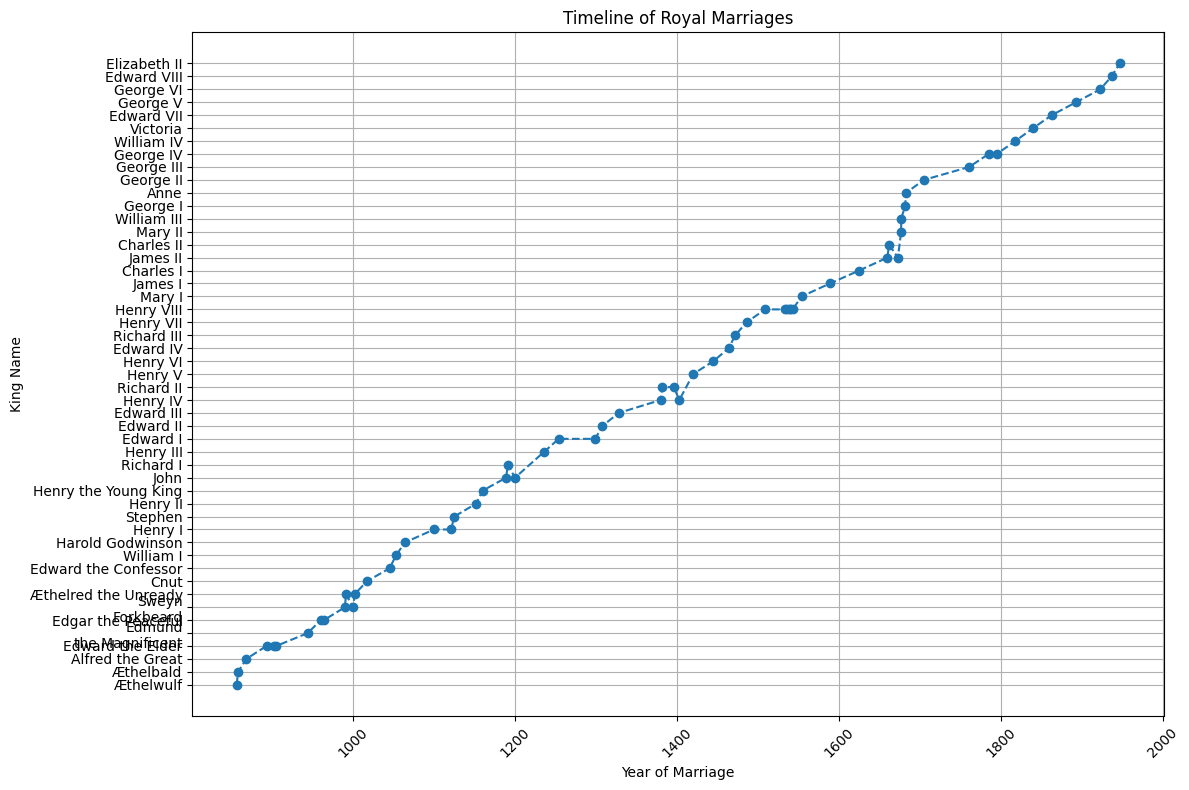

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

# Step 1: Convert 'year_of_marriage' to numeric (ignoring '?')
df['year_of_marriage'] = pd.to_numeric(df['year_of_marriage'], errors='coerce')

# Step 2: Drop rows where 'year_of_marriage' or 'king_name' is NaN
df.dropna(subset=['year_of_marriage', 'king_name'], inplace=True)

# Step 3: Sort the DataFrame by 'year_of_marriage' for a chronological order
df.sort_values('year_of_marriage', inplace=True)

# Step 4: Plot the timeline
plt.figure(figsize=(12, 8))
plt.plot(df['year_of_marriage'], df['king_name'], marker='o', linestyle='--')
plt.title('Timeline of Royal Marriages')
plt.xlabel('Year of Marriage')
plt.ylabel('King Name')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()
